# TFIDF

## import libraries and load dataset from the file path

In [1]:
# Loading data set using pandas.
import pandas as pd

file= "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Get the stop words

In [5]:

import nltk
import pandas as pd

#nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  

{'through', "didn't", 'didn', 'while', 'there', 'has', 'down', 'same', 'doesn', 'how', 'yours', 'his', "it's", 'are', 'himself', 'she', 'this', 'so', "shouldn't", 'needn', 'your', 'where', "won't", 'its', "hadn't", 'in', 'up', 'to', 'just', 'll', 're', 'these', 'mightn', "you've", "shan't", 'why', 'from', 'wouldn', 'again', 'i', 'more', 'only', "should've", 'if', 'both', 'for', 'ain', 'our', 'o', 'ours', 'have', 'above', 'had', 'at', 'mustn', 'hadn', 'that', 'do', 'until', 'own', 'he', 'no', 'too', 'what', "mightn't", 'between', "aren't", 'we', 'yourselves', 'the', 's', 'aren', 'out', "couldn't", 'before', 'than', 'under', 'most', 'those', 'hasn', 'few', 'myself', "you'd", 'doing', 'after', "haven't", 'by', "doesn't", 'below', 'into', 'is', 'd', 'yourself', "isn't", 'over', 've', 'but', 'am', 'were', 'nor', 'on', 'any', "don't", 'of', 'off', 'should', 'can', 'other', 'shan', 'because', "you'll", 'him', 'you', 'does', 'once', 'having', 'very', "needn't", 'wasn', 'as', 'be', "wasn't", "s

## Removing Stopwords

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
#nltk.download('stopwords')

# Load the CSV file into a DataFrame
file = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
dataframe = pd.read_csv(file)

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column
stop_words = set(stopwords.words('english'))
dataframe[text_column_name] = dataframe[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

## Pre - processing Pipeline

In [7]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]
# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

dataframe = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Run the Pipeline

In [8]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]
# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))
# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Counting tokens

In [9]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
dataframe['text_tokens'].map(counter.update)

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens
print(freq_df.head(10))

                 freq
token                
nations        124508
united         120763
international  117223
world           89421
countries       85734
peace           72625
development     62632
states          59713
people          59338
security        58425


## word cloud

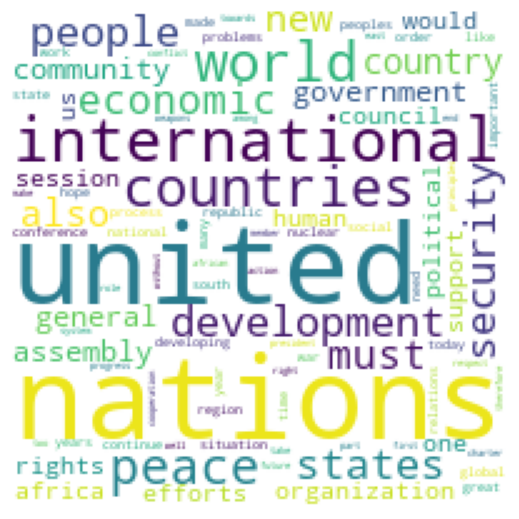

In [10]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 200, height=200, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


## TFIDF AND COMPARE

In [11]:
import numpy as np
from collections import Counter

def compute_idf(df, column='text_tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

# Assuming your DataFrame is named 'dataframe'
idf_df = compute_idf(dataframe)
print(idf_df.head(20))

               df       idf
token                      
wonders        70  4.775096
lawful        215  3.652953
diktat        117  4.261417
fundamental  4074  0.711211
straggle       12  6.538685
dominate      282  3.381684
west         2277  1.292977
fail         1562  1.669869
iraq         2299  1.283362
amply         230  3.585512
implement    2484  1.205966
fortress       33  5.527084
maintenance  2287  1.288595
forefront     462  2.888026
fact         4694  0.569551
king          402  3.027139
repressions    11  6.625696
resist        415  2.995313
angola       1628  1.628484
treachery      27  5.727754


In [12]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df.head())

                 freq         tfidf
token                              
nations        124508  12649.986284
united         120763  12285.608632
international  117223  12364.276226
world           89421   9503.708982
countries       85734  10888.485986


## word cloud

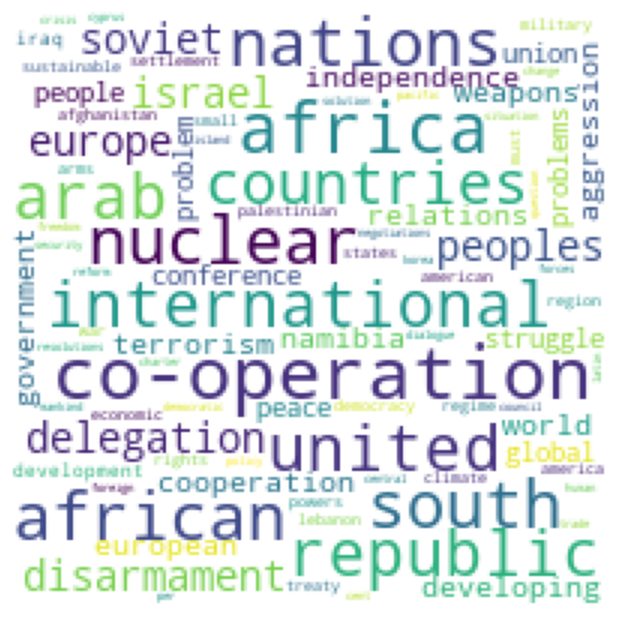

In [13]:
wc = WordCloud(background_color='white', width = 200, height=200, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


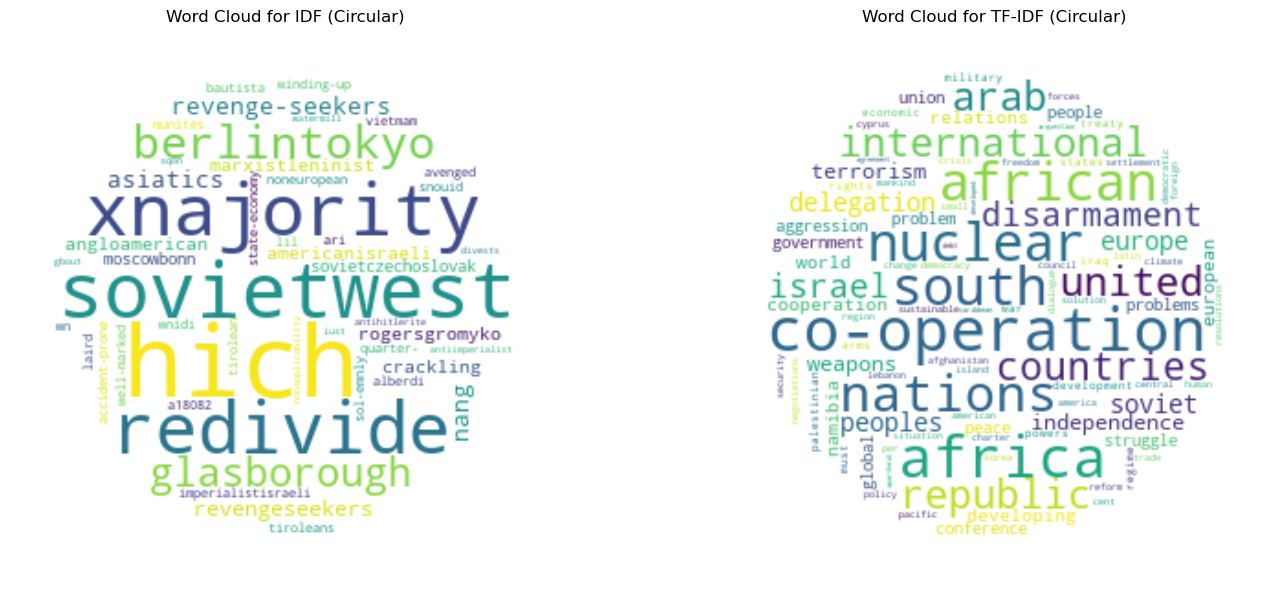

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Calculate IDF (Inverse Document Frequency) and TF-IDF (Term Frequency-Inverse Document Frequency)

# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circular mask for IDF
wordcloud_idf = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df['idf'].to_dict())

# Create WordCloud with a circular mask for TF-IDF
wordcloud_tfidf = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_df['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf, interpolation='bilinear')
plt.title('Word Cloud for IDF (Circular)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (Circular)')
plt.axis('off')

plt.tight_layout()
plt.show()


# Let’s compare 1970 TF and 1970 TFIDF

## Load dataset

In [16]:
# Import the pandas library
import pandas as pd

# Specify the file path
file ="C:/Users/prave/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Filter the DataFrame to include only rows where the 'year' column is equal to 1970
df_1970 = df[df['year'] == 1970]

# Display the first 20 rows of the filtered DataFrame
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Display the dataframe for the year 1970 

In [17]:
df_1970 = df[df['year'] == 1970]

# Display the DataFrame for the year 1970
print(df_1970.head())

   session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...  


## Print Stopwords for year 1970

In [18]:
import nltk
import pandas as pd

# Get stopwords for English language
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path for the CSV file containing the data for the year 1970
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df_1970 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970]

# Display the DataFrame for the year 1970
print(df_1970.head())

{'through', "didn't", 'didn', 'while', 'there', 'has', 'down', 'same', 'doesn', 'how', 'yours', 'his', "it's", 'are', 'himself', 'she', 'this', 'so', "shouldn't", 'needn', 'your', 'where', "won't", 'its', "hadn't", 'in', 'up', 'to', 'just', 'll', 're', 'these', 'mightn', "you've", "shan't", 'why', 'from', 'wouldn', 'again', 'i', 'more', 'only', "should've", 'if', 'both', 'for', 'ain', 'our', 'o', 'ours', 'have', 'above', 'had', 'at', 'mustn', 'hadn', 'that', 'do', 'until', 'own', 'he', 'no', 'too', 'what', "mightn't", 'between', "aren't", 'we', 'yourselves', 'the', 's', 'aren', 'out', "couldn't", 'before', 'than', 'under', 'most', 'those', 'hasn', 'few', 'myself', "you'd", 'doing', 'after', "haven't", 'by', "doesn't", 'below', 'into', 'is', 'd', 'yourself', "isn't", 'over', 've', 'but', 'am', 'were', 'nor', 'on', 'any', "don't", 'of', 'off', 'should', 'can', 'other', 'shan', 'because', "you'll", 'him', 'you', 'does', 'once', 'having', 'very', "needn't", 'wasn', 'as', 'be', "wasn't", "s

## Remove Stopwords for the year 1970

In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
# Load the CSV file into a DataFrame
file = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column for the year 1970
stop_words = set(stopwords.words('english'))
df_1970[text_column_name] = df_1970[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
    )

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

## Pre-Processing Pipeline for the year 1970

In [20]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk


# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens
# Specify the name of the text column in  DataFrame
text_column_name = 'text'

file = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 1970
df_1970[text_column_name+'_tokens'] = df_1970[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Run the Pipeline for the year 1970

In [21]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
            return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 1970
df_1970[text_column_name+'_tokens'] = df_1970[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)
# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Count Tokens for the year 1970

In [22]:
# correct
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
df_1970['text_tokens'].map(counter.update)

freq_df_1970 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_1970 = freq_df_1970.query('freq >= 1')
freq_df_1970.index.name = 'token'
freq_df_1970 = freq_df_1970.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens for the year 1970
print(freq_df_1970.head(10))

         freq
token        
       271673
e      176467
t      139896
i      111820
o      110558
a      109050
n      108917
s       86906
r       82825
h       64470


## TFIDF and Compare to the year 1970

In [23]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame for the year 1970 is named 'df_1970'
df_1970 = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
df_1970['text_tokens'] = df_1970['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Define IDF computation function
def compute_idf(df_1970, column='text_tokens', min_df_1970=1):
    def update(doc):
        counter.update(set(doc))
    # count tokens
    counter = Counter()
    df_1970[column].map(update)
    # create data frame and compute idf
    idf_df_1970 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_1970 = idf_df_1970.query('df >= @min_df_1970')
    idf_df_1970['idf'] = np.log(len(df_1970)/idf_df_1970['df']) + 0.1
    idf_df_1970.index.name = 'token'
    return idf_df_1970

# Compute IDF for the year 1970
idf_df_1970 = compute_idf(df_1970)
print(idf_df_1970.head(10))

               df       idf
token                      
wonders        70  4.775096
lawful        215  3.652953
diktat        117  4.261417
fundamental  4074  0.711211
straggle       12  6.538685
dominate      282  3.381684
west         2277  1.292977
fail         1562  1.669869
iraq         2299  1.283362
amply         230  3.585512


## TFIDF AND COMPARE FOR THE YEAR 1970

In [24]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df_1970['tfidf'] = freq_df_1970['freq'] * idf_df_1970['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df_1970.head())

         freq         tfidf
token                      
       271673           NaN
e      176467  623749.69414
t      139896           NaN
i      111820           NaN
o      110558           NaN


In [25]:

import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Assuming you have loaded the DataFrame for the year 1970
df_1970 = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for the English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
df_1970['text_tokens'] = df_1970['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Define IDF computation function
def compute_idf(df_1970, column='text_tokens', min_df_1970=1):
    def update(doc):
        counter.update(set(doc))
    # Count tokens
    counter = Counter()
    df_1970[column].map(update)
    # Create DataFrame and compute IDF
    idf_df_1970 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_1970 = idf_df_1970.query('df >= @min_df_1970')
    idf_df_1970['idf'] = np.log(len(df_1970)/idf_df_1970['df']) + 0.1
    idf_df_1970.index.name = 'token'
    return idf_df_1970

# Compute IDF for the year 1970
idf_df_1970 = compute_idf(df_1970)
# Display the specified output
print(idf_df_1970.loc[['objectives', 'intensifying', 'revolted', 'deeper', 'pitting', 'becoming', 'social-imperialism', 'intensify', 'land', 'love']])


                      df       idf
token                             
objectives          3257  0.935029
intensifying         278  3.395970
revolted              18  6.133219
deeper               347  3.174266
pitting               39  5.360030
becoming            1919  1.464032
social-imperialism    17  6.190378
intensify            759  2.391589
land                1941  1.452633
love                 472  2.866612


## wordcloud

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated IDF and TF-IDF values for the year 1970 and stored them in 'idf_df_1970' and 'freq_df_1970'

# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df_1970['tfidf'] = freq_df_1970['freq'] * idf_df_1970['idf']

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Generate word cloud for IDF for the year 1970 with a circular mask
wordcloud_idf_1970 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df_1970['idf'].to_dict())

# Generate word cloud for TF-IDF for the year 1970 with a circular mask
wordcloud_tfidf_1970 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_df_1970['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF for the year 1970
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_1970, interpolation='bilinear')
plt.title('Word Cloud for IDF (1970) - Circular')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_1970, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (1970) - Circular')
plt.axis('off')

plt.tight_layout()
plt.show()


ValueError: cannot convert float NaN to integer

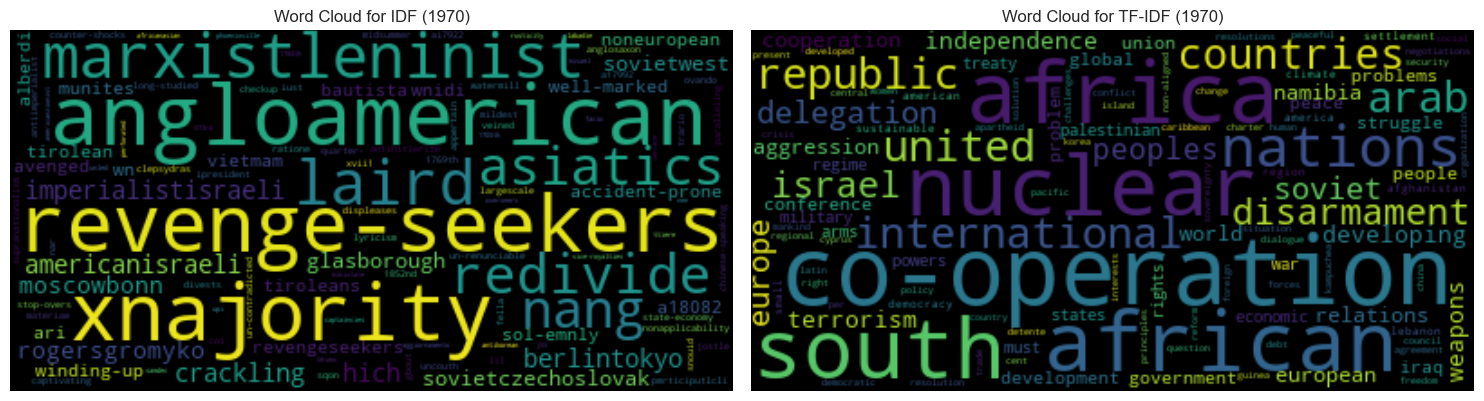

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have calculated IDF and TF-IDF values for the year 1970 and stored them in 'idf_df_1970' and 'freq_df_1970'

# Generate word cloud for IDF for the year 1970
wordcloud_idf_1970 = WordCloud(background_color='black').generate_from_frequencies(idf_df_1970['idf'].to_dict())

# Generate word cloud for TF-IDF for the year 1970
wordcloud_tfidf_1970 = WordCloud(background_color='black').generate_from_frequencies(freq_df_1970['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF for the year 1970
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_1970, interpolation='bilinear')
plt.title('Word Cloud for IDF (1970)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_1970, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (1970)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'freq_df' is the DataFrame containing the frequency information

# Generate word cloud for TF (Term Frequency) for the year 1970
wordcloud_tf_1970 = WordCloud(background_color='black').generate_from_frequencies(freq_df['freq'].to_dict())

# Display the word cloud for TF for the year 1970
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_tf_1970, interpolation='bilinear')
plt.title('Word Cloud for TF (1970)')
plt.axis('off')
plt.show()


## Comparing 2015 TF AND 2015 TFIDF

## import libraries and load dataset from the file path

In [ ]:
# Import the pandas library
import pandas as pd

# Specify the file path
file = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Filter the DataFrame to include only rows where the 'year' column is equal to 2015
df_2015 = df[df['year'] == 2015]

# Display the first 20 rows of the filtered DataFrame
df_2015.head(20)

## Display the dataframe for the year 2015

In [ ]:
df_2015 = df[df['year'] == 2015]

# Display the DataFrame for the year 1970
print(df_2015.head())

## Print Stopwords for the year 2015

In [ ]:
import nltk
import pandas as pd

# Get stopwords for English language
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path for the CSV file containing the data for the year 2015
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df_2015 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015]

# Display the DataFrame for the year 2015
print(df_2015.head())

## Removing Stopwords for the year 2015

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Load the CSV file into a DataFrame
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015].copy()

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords for the 'text' column for the year 2015
stop_words = set(stopwords.words('english'))
df_2015[text_column_name] = df_2015[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame for the year 2015
print(df_2015.head(10))

## Preprocessing the pipeline for the year 2015

In [ ]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 2015
df_2015[text_column_name+'_tokens'] = df_2015[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 2015
print(df_2015.head(10))

## Run the pipeline for the year 2015

In [27]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 2015
df_2015[text_column_name+'_tokens'] = df_2015[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 2015
print(df_2015.head(10))

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

## Counting the tokens for the year 2015

In [29]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
df_2015['text_tokens'].map(counter.update)

freq_df_2015 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_2015 = freq_df_2015.query('freq >= 1')
freq_df_2015.index.name = 'token'
freq_df_2015 = freq_df_2015.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens for the year 2015
print(freq_df_2015.head(10))

               freq
token              
nations        2587
united         2571
development    1754
international  1727
world          1635
security       1391
peace          1281
people         1229
countries      1086
must           1033


## TFIDF and compare for the year 2015

In [30]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame for the year df_2015 is named 'df_2015'
df_2015 = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
df_2015['text_tokens'] = df_2015['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Define IDF computation function
def compute_idf(df_2015, column='text_tokens', min_df_2015=1):
    def update(doc):
        counter.update(set(doc))
    # count tokens
    counter = Counter()
    df_2015[column].map(update)
    # create data frame and compute idf
    idf_df_2015 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_2015 = idf_df_2015.query('df >= @min_df_2015')
    idf_df_2015['idf'] = np.log(len(df_2015)/idf_df_2015['df']) + 0.1
    idf_df_2015.index.name = 'token'
    return idf_df_2015

# Compute IDF for the year 2015
idf_df_2015 = compute_idf(df_2015)
print(idf_df_2015.head(10))

               df       idf
token                      
wonders        70  4.775096
lawful        215  3.652953
diktat        117  4.261417
fundamental  4074  0.711211
straggle       12  6.538685
dominate      282  3.381684
west         2277  1.292977
fail         1562  1.669869
iraq         2299  1.283362
amply         230  3.585512


## TFIDF = TF *1DF FOR 2015

In [31]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df_2015['tfidf'] = freq_df_2015['freq'] * idf_df_2015['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df_2015.head())

               freq       tfidf
token                          
nations        2587  262.838649
united         2571  261.556104
development    1754  245.473993
international  1727  182.157981
world          1635  173.768625


## Wordcloud for 2015

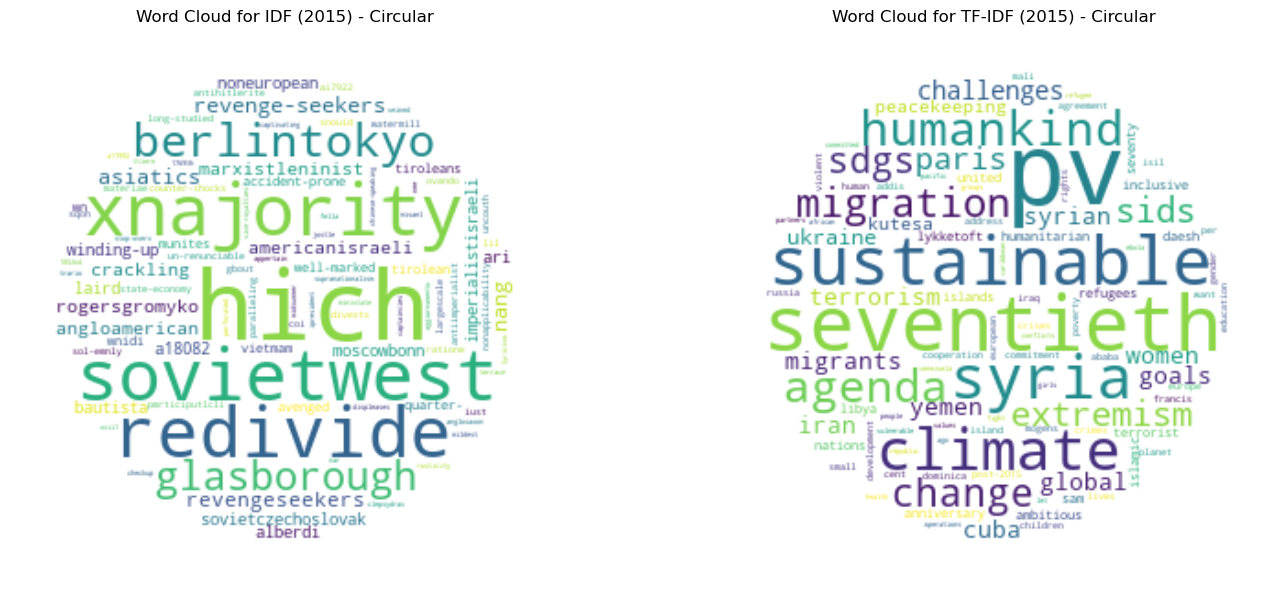

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated IDF and TF-IDF values for the year 1970 and stored them in 'idf_df_1970' and 'freq_df_1970'

# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df_2015['tfidf'] = freq_df_2015['freq'] * idf_df_2015['idf']

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Generate word cloud for IDF for the year 2015 with a circular mask
wordcloud_idf_2015 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df_2015['idf'].to_dict())

# Generate word cloud for TF-IDF for the year 2015 with a circular mask
wordcloud_tfidf_2015 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_df_2015['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF for the year 2015
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_2015, interpolation='bilinear')
plt.title('Word Cloud for IDF (2015) - Circular')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_2015, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (2015) - Circular')
plt.axis('off')

plt.tight_layout()
plt.show()


## Printing stopwords for the country name 'Albania'

In [33]:
import nltk
import pandas as pd

# Download NLTK stopwords corpus
# nltk.download('stopwords')

# Get stopwords for English language
stopwords = set(nltk.corpus.stopwords.words('english'))

# Specify the file path for the CSV file containing the data for country name Albania
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df_country_name = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the country name Albania
df_country_name = df_country_name[df_country_name['country_name'] == 'Albania']

# Display the DataFrame for the country
print(df_country_name.head())

     session  year country country_name     speaker position  \
0         25  1970     ALB      Albania     Mr. NAS      NaN   
71        26  1971     ALB      Albania    Mr. NASE      NaN   
187       27  1972     ALB      Albania    Mr. Nase      NaN   
312       28  1973     ALB      Albania        Nase      NaN   
432       29  1974     ALB      Albania  Mr. Malile      NaN   

                                                  text  
0    33: May I first convey to our President the co...  
71   110.\t  This session of the General Assembly i...  
187  First, may I, Mr. President, express to you th...  
312  ﻿86.\tMr. President, on behalf of the People's...  
432  Mr. President, I wish first of all, on behalf ...  


## Removing Stopwords from the Country name 'Albania'

In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Load the CSV file into a DataFrame
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the country name Albania
df_country_name = df[df['country_name'] == 'Albania'].copy()

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords for the 'text' column for the country name Albania
stop_words = set(stopwords.words('english'))
df_country_name[text_column_name] = df_country_name[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame for the country name Albania
print(df_country_name.head(10))

      session  year country country_name      speaker position  \
0          25  1970     ALB      Albania      Mr. NAS      NaN   
71         26  1971     ALB      Albania     Mr. NASE      NaN   
187        27  1972     ALB      Albania     Mr. Nase      NaN   
312        28  1973     ALB      Albania         Nase      NaN   
432        29  1974     ALB      Albania   Mr. Malile      NaN   
561        30  1975     ALB      Albania    Mr. NASE       NaN   
687        31  1976     ALB      Albania  Mr. Mallile      NaN   
822        32  1977     ALB      Albania         Nase      NaN   
962        33  1978     ALB      Albania         Nase      NaN   
1102       34  1979     ALB      Albania         Nase      NaN   

                                                   text  
0     33: may first convey president congratulations...  
71    110. session general assembly meeting time new...  
187   first, may i, mr. president, express congratul...  
312   ﻿86. mr. president, behalf people's

## Pre-processing pipeline for the country name 'Albania'

In [35]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the country name Albania
df_country_name = df[df['country_name'] == 'Albania'].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the country name Albania
df_country_name[text_column_name+'_tokens'] = df_country_name[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the country
print(df_country_name.head(10))

      session  year country country_name      speaker position  \
0          25  1970     ALB      Albania      Mr. NAS      NaN   
71         26  1971     ALB      Albania     Mr. NASE      NaN   
187        27  1972     ALB      Albania     Mr. Nase      NaN   
312        28  1973     ALB      Albania         Nase      NaN   
432        29  1974     ALB      Albania   Mr. Malile      NaN   
561        30  1975     ALB      Albania    Mr. NASE       NaN   
687        31  1976     ALB      Albania  Mr. Mallile      NaN   
822        32  1977     ALB      Albania         Nase      NaN   
962        33  1978     ALB      Albania         Nase      NaN   
1102       34  1979     ALB      Albania         Nase      NaN   

                                                   text  \
0     33: May I first convey to our President the co...   
71    110.\t  This session of the General Assembly i...   
187   First, may I, Mr. President, express to you th...   
312   ﻿86.\tMr. President, on behalf 

## Run the Pipeline for the country name 'Albania'

In [36]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

file_path = "C:/Users/prave/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the country name Albania
df_country_name = df[df['country_name'] == 'Albania'].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for country name Albania
df_country_name[text_column_name+'_tokens'] = df_country_name[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 2015
print(df_country_name.head(10))

      session  year country country_name      speaker position  \
0          25  1970     ALB      Albania      Mr. NAS      NaN   
71         26  1971     ALB      Albania     Mr. NASE      NaN   
187        27  1972     ALB      Albania     Mr. Nase      NaN   
312        28  1973     ALB      Albania         Nase      NaN   
432        29  1974     ALB      Albania   Mr. Malile      NaN   
561        30  1975     ALB      Albania    Mr. NASE       NaN   
687        31  1976     ALB      Albania  Mr. Mallile      NaN   
822        32  1977     ALB      Albania         Nase      NaN   
962        33  1978     ALB      Albania         Nase      NaN   
1102       34  1979     ALB      Albania         Nase      NaN   

                                                   text  \
0     33: May I first convey to our President the co...   
71    110.\t  This session of the General Assembly i...   
187   First, may I, Mr. President, express to you th...   
312   ﻿86.\tMr. President, on behalf 

## Counting the Token for the country name 'Albania'

In [37]:
df_country_name
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
df_country_name['text_tokens'].map(counter.update)

freq_country_name = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_country_name = freq_country_name.query('freq >= 1')
freq_country_name.index.name = 'token'
freq_country_name = freq_country_name.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens for country name albania
print(freq_country_name.head(10))

               freq
token              
united          937
peoples         886
people          832
countries       799
states          757
albania         750
world           576
peace           528
nations         501
international   497


## TFIDF and comapre for the country name 'Albania'

In [38]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame for the year 2015 is named 'df_2015'
df_country_name = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Filter DataFrame to include only rows with 'country_name' as 'Albania'
df_country_name_albania = df_country_name[df_country_name['country_name'] == 'Albania']

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the filtered DataFrame
df_country_name_albania['text_tokens'] = df_country_name_albania['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Define IDF computation function
def compute_idf(df, column='text_tokens', min_df=1):
    def update(doc):
        counter.update(set(doc))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

# Compute IDF for the filtered DataFrame
idf_df_albania = compute_idf(df_country_name_albania)
print(idf_df_albania.head(10))


             df       idf
token                    
wonders       1  3.928641
lawful        6  2.136882
diktat       14  1.289584
fundamental  27  0.632805
straggle      2  3.235494
dominate     11  1.530746
west         15  1.220591
fail         18  1.038270
iraq         21  0.884119
amply         1  3.928641


C:\Users\prave\AppData\Local\Temp\ipykernel_9196\1402768283.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_name_albania['text_tokens'] = df_country_name_albania['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)


## TFIDF = TF *1DF for the Country name 'Albania'

In [39]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_country_name['tfidf'] = freq_country_name['freq'] * idf_df_albania['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_country_name.head())

           freq       tfidf
token                      
united      937   93.700000
peoples     886  356.420852
people      832  120.183866
countries   799   79.900000
states      757  200.665371


## word cloud

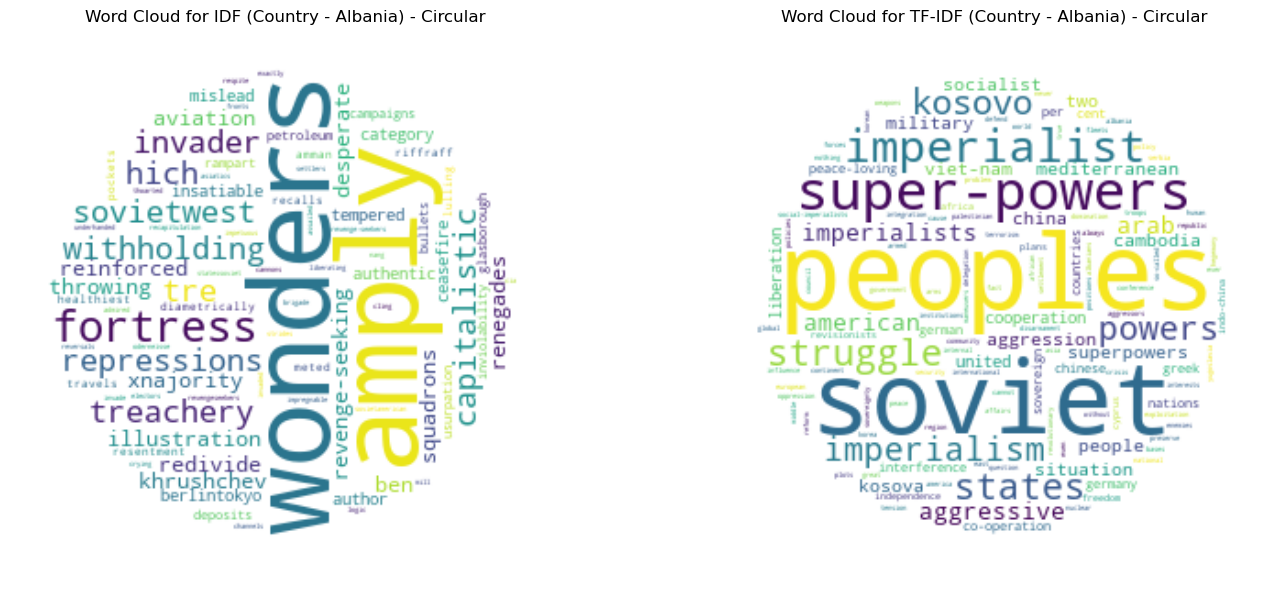

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated IDF and TF-IDF values for the year 1970 and stored them in 'idf_df_1970' and 'freq_df_1970'

# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_country_name['tfidf'] = freq_country_name['freq'] * idf_df_albania['idf']

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Generate word cloud for IDF for the year 2015 with a circular mask
wordcloud_idf_2015 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df_albania['idf'].to_dict())

# Generate word cloud for TF-IDF for the year 2015 with a circular mask
wordcloud_tfidf_2015 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_country_name['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF for the year 2015
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_2015, interpolation='bilinear')
plt.title('Word Cloud for IDF (Country - Albania) - Circular')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_2015, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (Country - Albania) - Circular')
plt.axis('off')

plt.tight_layout()
plt.show()


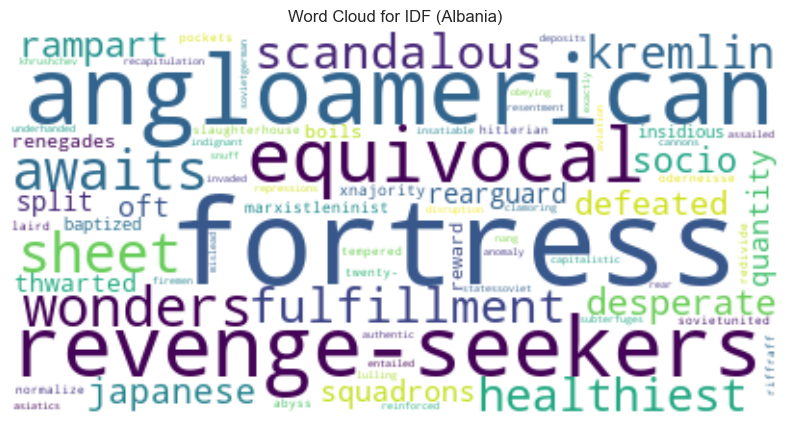

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already computed IDF for the 'country_name' (e.g., idf_df_albania)

# Generate word cloud for IDF for the country_name
wordcloud_idf_albania = WordCloud(background_color='white').generate_from_frequencies(idf_df_albania['idf'].to_dict())

# Display the word cloud for IDF for the country_name
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idf_albania, interpolation='bilinear')
plt.title('Word Cloud for IDF (Albania)')
plt.axis('off')
plt.show()


## Function to count the keywords

In [48]:
import pandas as pd
from collections import Counter
import regex as re
from nltk.corpus import stopwords

# Load your DataFrame
df = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', str(text))

# Apply tokenization to the 'text' column
df['tokens'] = df['text'].apply(tokenize)

# Calculate the number of tokens for each row
df['num_tokens'] = df['tokens'].map(len)

# Function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply stopword removal to the 'tokens' column
df['tokens'] = df['tokens'].apply(remove_stop, stop_words=stop_words)

# Function to count keywords
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Sample keywords
keywords_to_count = ['sample', 'sentence', 'example']

# Apply count_keywords to the 'tokens' column
df['keyword_counts'] = df['tokens'].apply(count_keywords, keywords=keywords_to_count)

# Display the DataFrame
print(df.head())


   session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  \
0  33: May I first convey to our President the co...   
1  177.\t : It is a fortunate coincidence that pr...   
2  100.\t  It is a pleasure for me to extend to y...   
3  155.\t  May I begin by expressing to Ambassado...   
4  176. No doubt each of us, before coming up to ...   

                                              tokens  num_tokens  \
0  [May, first, convey, President, congratulation...        8256   
1  [fortunate, coincidence, precisely, time, Unit...        4711   
2  [pleasure, extend, Mr, President, w

## Function to group by year

In [52]:
# Sample usage
df = pd.read_csv("C:/Users/prave/Downloads/un-general-debates-blueprint.csv")
# Assuming you have 'tokens' column already prepared
df['tokens'] = df['text'].apply(tokenize)

# Sample keywords
keywords_to_count = ['country', 'speaker', 'position']

# Group by 'year' and count keywords
result_df = count_keywords(df, keywords=keywords_to_count)

# Display the result
print(result_df)


[1, 1, 1]


## Heatmap

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming count_keywords_by function is defined

keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  

# Calculate 'num_tokens' if not already calculated
df['num_tokens'] = df['tokens'].map(len)


# Compute relative frequencies based on the total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# Apply square root as a sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

# Plotting
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 

# Create a heatmap using Seaborn
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

# Show the plot
plt.show()


C:\Users\prave\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\prave\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


KeyboardInterrupt: 